<a href="https://colab.research.google.com/github/Ashishkumarpanda/Train-Plot-CNN-layer/blob/main/Hidddenlayercheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras-tuner

     |████████████████████████████████| 61kB 3.8MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=2070f5cf1b0a7e01523ba6bc482397f80d556649d390e6a895de3c3b43981694
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=c226e45de5375d9fd32b9339924339f812639073bc57a7105335dc6717c4ead1
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [23]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D
from keras.optimizers import Adam
from keras.activations import relu,softmax
from kerastuner import RandomSearch
from keras.utils.vis_utils import plot_model
from sklearn import metrics

In [5]:
data=keras.datasets.mnist

In [6]:
(x_train,y_train),(x_test,y_test)=data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


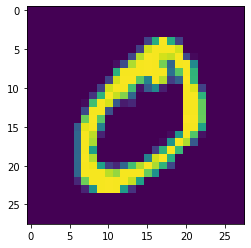

In [7]:
plt.imshow(x_train[1])

In [8]:
x_train=x_train/255.0
x_test=x_test/255.0


In [9]:
x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)

In [10]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [11]:
search=RandomSearch(build_model,'val_accuracy',max_trials=5,directory='output',project_name='mnist')

In [12]:
search.search(x_train,y_train,epochs=3,validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2561 - accuracy: 0.9245 - val_loss: 0.1292 - val_accuracy: 0.9617
Epoch 2/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1240 - accuracy: 0.9621 - val_loss: 0.1031 - val_accuracy: 0.9707
Epoch 3/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0998 - accuracy: 0.9690 - val_loss: 0.1026 - val_accuracy: 0.9700


Epoch 1/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1192 - accuracy: 0.9633 - val_loss: 0.0537 - val_accuracy: 0.9852
Epoch 2/3
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0414 - accuracy: 0.9866 - val_loss: 0.0406 - val_accuracy: 0.9892
Epoch 3/3
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0398 - val_accuracy: 0.9900


Epoch 1/3
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2007 - accuracy: 0.9389 - val_loss: 0.1488 - val_accuracy: 0.9653
Epoch 2/3
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1085 - accuracy: 0.9680 - val_loss: 0.0796 - val_accuracy: 0.9785
Epoch 3/3
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0799 - accuracy: 0.9756 - val_loss: 0.0898 - val_accuracy: 0.9768


Epoch 1/3
1688/1688 [==============================] - 7s 4ms/step - loss: 2.3263 - accuracy: 0.1101 - val_loss: 2.3035 - val_accuracy: 0.1113
Epoch 2/3
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3023 - accuracy: 0.1101 - val_loss: 2.3016 - val_accuracy: 0.1113
Epoch 3/3
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3025 - accuracy: 0.1091 - val_loss: 2.3038 - val_accuracy: 0.1050


Epoch 1/3
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3102 - accuracy: 0.1088 - val_loss: 2.3031 - val_accuracy: 0.1113
Epoch 2/3
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3024 - accuracy: 0.1100 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 3/3
1688/1688 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.1099 - val_loss: 2.3018 - val_accuracy: 0.1113


INFO:tensorflow:Oracle triggered exit


In [13]:
model=search.get_best_models(num_models=1)[0]

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 80)        2080      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 48)        34608     
_________________________________________________________________
flatten (Flatten)            (None, 23232)             0         
_________________________________________________________________
dense (Dense)                (None, 80)                1858640   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                810       
Total params: 1,896,138
Trainable params: 1,896,138
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x_train,y_train,epochs=10,validation_split=0.1,initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0177 - accuracy: 0.9940 - val_loss: 0.0426 - val_accuracy: 0.9898
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0538 - val_accuracy: 0.9878
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0421 - val_accuracy: 0.9900
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0078 - accuracy: 0.9977 - val_loss: 0.0542 - val_accuracy: 0.9898
Epoch 8/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0085 - accuracy: 0.9976 - val_loss: 0.0460 - val_accuracy: 0.9922
Epoch 9/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 0.0588 - val_accuracy: 0.9905
Epoch 10/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.0577 - val_accuracy

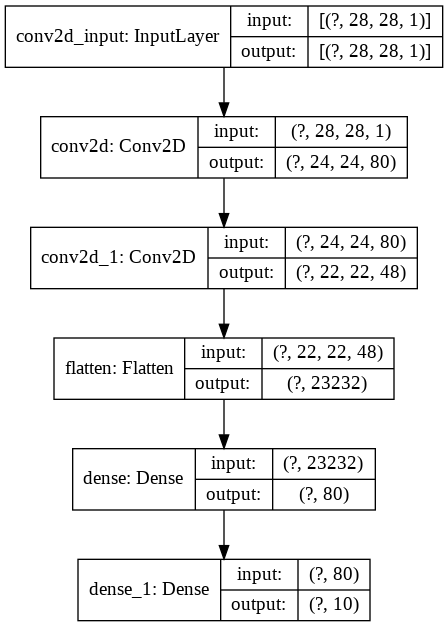

In [16]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
y_pred=model.predict_classes(x_test)

In [28]:
val=metrics.accuracy_score(y_test,y_pred)
print("accuracy is=",str(val*100)+" %")

accuracy is= 99.09 %
